In [99]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

data = np.loadtxt("pca_data.txt")
# mean = np.mean(data, axis=0)
# centered_data = data - mean

# Normalize the data by dividing by the standard deviation
scaler = StandardScaler()
normalized_data = scaler.fit_transform(data)


In [100]:
cov_matrix = np.cov(normalized_data.T)

eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

sorted_indices = np.argsort(eigenvalues)[::-1]
sorted_eigenvectors = eigenvectors[:, sorted_indices]
sorted_eigenvalues = eigenvalues[sorted_indices]

top_two_eigenvectors = sorted_eigenvectors[:, :2]
projected_data = np.dot(normalized_data, top_two_eigenvectors)

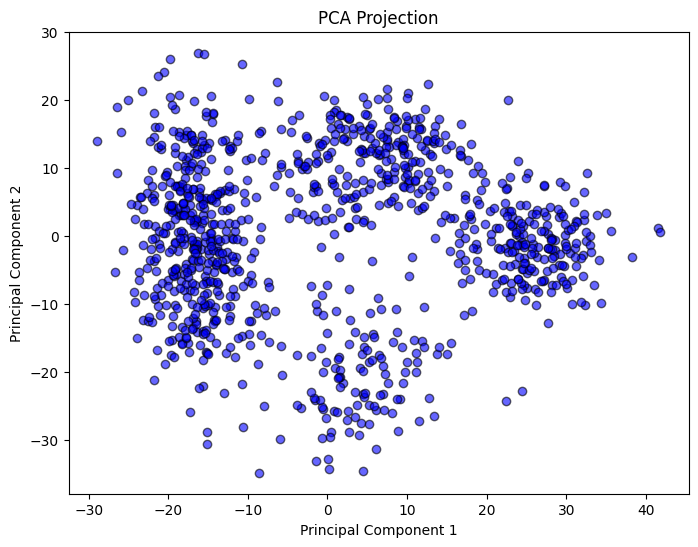

In [101]:
plt.figure(figsize=(8, 6))
plt.scatter(projected_data[:, 0], projected_data[:, 1], c='blue', edgecolors='k', alpha=0.6)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("PCA Projection")
plt.show()

In [102]:
from sklearn.decomposition import PCA
pca = PCA(n_components=50)  # Reduce to 50 components (you can choose based on the variance explained)
pca_data = pca.fit_transform(data)

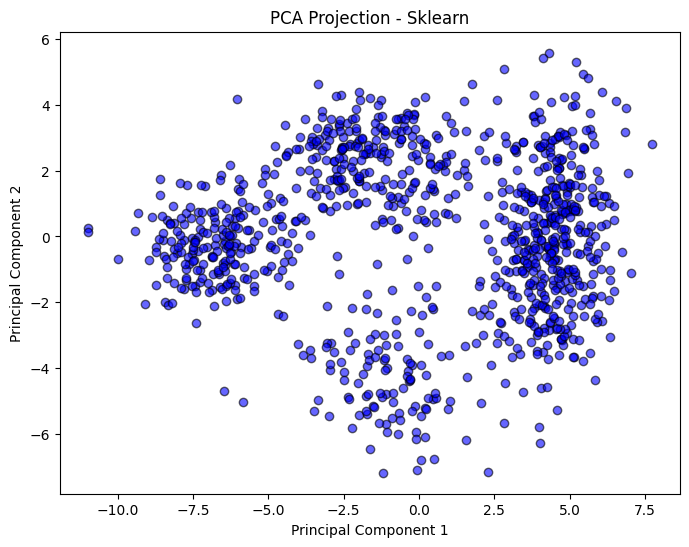

In [103]:
plt.figure(figsize=(8, 6))
plt.scatter(pca_data[:, 0], pca_data[:, 1], c='blue', edgecolors='k', alpha=0.6)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("PCA Projection - Sklearn")
plt.show()

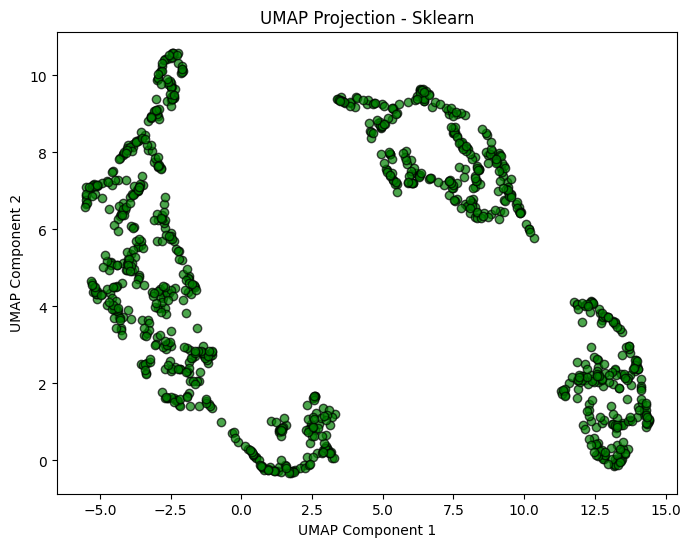

In [104]:
import umap


# UMAP
umap_model = umap.UMAP(n_neighbors=15, min_dist=0.1, metric='euclidean')
umap_embedding = umap_model.fit_transform(data)


# Plot UMAP
plt.figure(figsize=(8, 6))
plt.scatter(umap_embedding[:, 0], umap_embedding[:, 1], c='green', edgecolors='k', alpha=0.7)
plt.xlabel("UMAP Component 1")
plt.ylabel("UMAP Component 2")
plt.title("UMAP Projection - Sklearn")
plt.show()

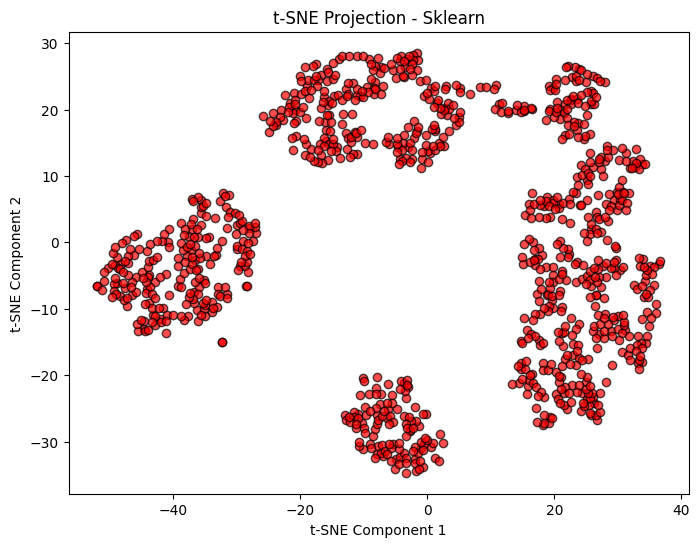

In [105]:
from sklearn.manifold import TSNE

# t-SNE
tsne_model = TSNE(n_components=2, random_state=42)
tsne_embedding = tsne_model.fit_transform(data)

# Plot t-SNE
plt.figure(figsize=(8, 6))
plt.scatter(tsne_embedding[:, 0], tsne_embedding[:, 1], c='red', edgecolors='k', alpha=0.7)
plt.xlabel("t-SNE Component 1")
plt.ylabel("t-SNE Component 2")
plt.title("t-SNE Projection - Sklearn")
plt.show()